# Analysis of Running playlists songs
- Exploring songs in spotify Running playlists (20 playlists)
- Use Spotify API https://developer.spotify.com/

## Libraries

In [1]:
import spotify.sync as spotify
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing

# Setting colors
cmap = plt.cm.summer
colors = [cmap(i) for i in np.linspace(0.1,0.85,5)]
color = 'tab:green'
cm = [cmap(1.*i/2) for i in [0, 5]]

sns.set(style='darkgrid')

## Get data

In [2]:
# Use data saved in csv format
df_songs = pd.read_csv('/Users/MVadi/Desktop/HACKATHON/data/running_songs.csv')
df_songs

,spotify_id,title,artist,feat_artists,spotify_url,popularity,lyrics,duration_ms,song_art_image_url,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spechiness
0,4cG7HUWYHBV6R6tHn1gxrl,Friday,Riton,"['Nightcrawlers', 'Mufasa & Hypeman']",https://open.spotify.com/track/4cG7HUWYHBV6R6t...,93,"Mufasa\nHmm?\nYou know we finally here, right?...",169153,https://images.genius.com/21ba0523380853536b3e...,0.824,...,2,-3.424,1,NaN,0.00760,0.000132,0.3030,0.801,122.980,0.1260
1,6TO1XrGYwdw5y6lx3x5Aa7,Make My Mind Go,Martin Jensen,"['Rompasso', 'FAULHABER']",https://open.spotify.com/track/6TO1XrGYwdw5y6l...,63,Think I'm falling for your secrets\nThink I'm ...,151367,https://images.genius.com/e6fc15d8aa80ff1e9653...,0.716,...,2,-5.161,0,NaN,0.00646,0.000005,0.1240,0.576,124.005,0.0278
2,0siYMEsGrzzzlWLXK5zJfS,BED,Joel Corry,"['RAYE', 'David Guetta']",https://open.spotify.com/track/0siYMEsGrzzzlWL...,89,"I got a bed, but I'd rather be in yours, yours...",178087,https://images.genius.com/86bc0ad69f7aa23c7d7a...,0.671,...,6,-4.593,1,NaN,0.01420,0.002210,0.3330,0.618,123.989,0.0341
3,5LJZzrGnCY5Djyq2oq3tvR,Fire,James Carter,['Laura White'],https://open.spotify.com/track/5LJZzrGnCY5Djyq...,43,There's a cutthroat hurricane\nComin' down on ...,113422,https://images.genius.com/bc3d07b58535e28c150d...,0.805,...,5,-5.947,0,NaN,0.02890,0.002080,0.2180,0.518,123.004,0.0503
4,4eBMIU9A2DTYxcO0uOiGiS,DESTINY,WISEKIDS,"['Paolo Pellegrino', 'Shibui']",https://open.spotify.com/track/4eBMIU9A2DTYxcO...,48,Cover me\nJehovah cover me\nWisekid lele yi oh...,154512,https://images.genius.com/0a32865cd727b6085499...,0.780,...,2,-4.293,0,NaN,0.05250,0.213000,0.0571,0.475,122.926,0.0362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,60mItLdFl6xkYc1sAjlZlf,In This Shirt,The Irrepressibles,[],https://open.spotify.com/track/60mItLdFl6xkYc1...,40,I am lost in a rainbow\nNow our rainbow is gon...,334986,https://images.genius.com/627b1b5a2b8c747f76a3...,0.310,...,9,-6.463,1,NaN,0.70900,0.247000,0.1250,0.038,79.863,0.0299
234,6NPVjNh8Jhru9xOmyQigds,Happy,Various Artists,[],https://open.spotify.com/track/6NPVjNh8Jhru9xO...,1,1/1\nAha Gazelle - 180 - 7/7\nFMLYBND - FMLYBN...,233305,https://images.genius.com/b25c9c45680507352c87...,0.652,...,1,-6.819,1,NaN,0.28600,0.000000,0.0886,0.962,159.911,0.1530
235,5wTVNpi5WDByxBgKgUE6MU,Supermodel,SZA,[],https://open.spotify.com/track/5wTVNpi5WDByxBg...,71,"That is my greatest fear\nThat if, if I lost c...",181120,https://images.genius.com/c4f225ffe9ed2762145f...,0.613,...,6,-8.874,1,NaN,0.65100,0.000000,0.2600,0.252,119.737,0.2880
236,4Gg8A1VAJEYqxhBe6ZYlvN,My Paradise,Tim Grand,['WildVibes'],https://open.spotify.com/track/4Gg8A1VAJEYqxhB...,0,Rented a boat out on the coast\nCalifornia kno...,181935,https://assets.genius.com/images/default_cover...,0.715,...,1,-6.606,0,NaN,0.07990,0.000004,0.3660,0.653,124.016,0.0365


It is worth mentioning that audio features describe:
- **popularity**: the popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past;
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic;
- **danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable;
- **duration_ms**: the duration of the track in milliseconds;
- **energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy;
- **instrumentalness**: predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0;
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on;
- **liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live;
- **loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db;
- **mode**: mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0;
- **tempo**: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration;
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

They can be summarized in: 
- **Mood**: Danceability, Valence, Energy, Tempo, Key, Mode
- **Properties**: Loudness, Instrumentalness, Duration_ms
- **Context**: Liveness, Acousticness, Popularity

In [3]:
# Define group of columns

audio_features_col = ['popularity',
                     'duration_ms',
                     'danceability',
                     'energy',
                     'loudness',
                     'acousticness',
                     'instrumentalness',
                     'liveness',
                     'valence',
                     'tempo']

metadata_col = ['spotify_id',
                'title',
                'artist',
                'feat_artists',
                'spotify_url',
                'song_art_image_url',
                'lyrics']

categorical_col = ['mode',
                  'key']

In [4]:
# Look at only audio fearures
df_songs[audio_features_col]

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
0,93,169153,0.824,0.862,-3.424,0.00760,0.000132,0.3030,0.801,122.980
1,63,151367,0.716,0.622,-5.161,0.00646,0.000005,0.1240,0.576,124.005
2,89,178087,0.671,0.782,-4.593,0.01420,0.002210,0.3330,0.618,123.989
3,43,113422,0.805,0.749,-5.947,0.02890,0.002080,0.2180,0.518,123.004
4,48,154512,0.780,0.742,-4.293,0.05250,0.213000,0.0571,0.475,122.926
...,...,...,...,...,...,...,...,...,...,...
233,40,334986,0.310,0.484,-6.463,0.70900,0.247000,0.1250,0.038,79.863
234,1,233305,0.652,0.757,-6.819,0.28600,0.000000,0.0886,0.962,159.911
235,71,181120,0.613,0.442,-8.874,0.65100,0.000000,0.2600,0.252,119.737
236,0,181935,0.715,0.750,-6.606,0.07990,0.000004,0.3660,0.653,124.016


In [5]:
# Look at only audio fearures
df_songs[categorical_col]

,mode,key
0,1,2
1,0,2
2,1,6
3,0,5
4,0,2
...,...,...
233,1,9
234,1,1
235,1,6
236,0,1


In [6]:
df_songs[metadata_col]

,spotify_id,title,artist,feat_artists,spotify_url,song_art_image_url,lyrics
0,4cG7HUWYHBV6R6tHn1gxrl,Friday,Riton,"['Nightcrawlers', 'Mufasa & Hypeman']",https://open.spotify.com/track/4cG7HUWYHBV6R6t...,https://images.genius.com/21ba0523380853536b3e...,"Mufasa\nHmm?\nYou know we finally here, right?..."
1,6TO1XrGYwdw5y6lx3x5Aa7,Make My Mind Go,Martin Jensen,"['Rompasso', 'FAULHABER']",https://open.spotify.com/track/6TO1XrGYwdw5y6l...,https://images.genius.com/e6fc15d8aa80ff1e9653...,Think I'm falling for your secrets\nThink I'm ...
2,0siYMEsGrzzzlWLXK5zJfS,BED,Joel Corry,"['RAYE', 'David Guetta']",https://open.spotify.com/track/0siYMEsGrzzzlWL...,https://images.genius.com/86bc0ad69f7aa23c7d7a...,"I got a bed, but I'd rather be in yours, yours..."
3,5LJZzrGnCY5Djyq2oq3tvR,Fire,James Carter,['Laura White'],https://open.spotify.com/track/5LJZzrGnCY5Djyq...,https://images.genius.com/bc3d07b58535e28c150d...,There's a cutthroat hurricane\nComin' down on ...
4,4eBMIU9A2DTYxcO0uOiGiS,DESTINY,WISEKIDS,"['Paolo Pellegrino', 'Shibui']",https://open.spotify.com/track/4eBMIU9A2DTYxcO...,https://images.genius.com/0a32865cd727b6085499...,Cover me\nJehovah cover me\nWisekid lele yi oh...
...,...,...,...,...,...,...,...
233,60mItLdFl6xkYc1sAjlZlf,In This Shirt,The Irrepressibles,[],https://open.spotify.com/track/60mItLdFl6xkYc1...,https://images.genius.com/627b1b5a2b8c747f76a3...,I am lost in a rainbow\nNow our rainbow is gon...
234,6NPVjNh8Jhru9xOmyQigds,Happy,Various Artists,[],https://open.spotify.com/track/6NPVjNh8Jhru9xO...,https://images.genius.com/b25c9c45680507352c87...,1/1\nAha Gazelle - 180 - 7/7\nFMLYBND - FMLYBN...
235,5wTVNpi5WDByxBgKgUE6MU,Supermodel,SZA,[],https://open.spotify.com/track/5wTVNpi5WDByxBg...,https://images.genius.com/c4f225ffe9ed2762145f...,"That is my greatest fear\nThat if, if I lost c..."
236,4Gg8A1VAJEYqxhBe6ZYlvN,My Paradise,Tim Grand,['WildVibes'],https://open.spotify.com/track/4Gg8A1VAJEYqxhB...,https://assets.genius.com/images/default_cover...,Rented a boat out on the coast\nCalifornia kno...


## Data pre-processing

### Drop missing value

In [7]:
# Drop columns if all value are missing
df_songs = df_songs.dropna(axis='columns', how='all')

### Transform necessary columns to numerical

In [8]:
# Transform column to numeric
df_songs.loc[:, 'popularity'] = pd.to_numeric(df_songs.loc[:, ('popularity')])
df_songs.loc[:, 'duration_ms'] = pd.to_numeric(df_songs.loc[:, ('duration_ms')])
df_songs.loc[:, 'mode'] = pd.to_numeric(df_songs.loc[:, ('mode')])

/Users/MVadi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### One hot encoding for categorical features

In [9]:
# Since key features is a categorical one, use one-hot-encoding
dummies = pd.get_dummies(df_songs['key'])

# Dictionary to map the key
key_dict ={0: 'C', 1: 'Db', 2: 'D', 3: 'Eb', 4: 'E', 5: 'F', 6: 'Gb', 7: 'G', 8: 'Ab', 9: 'A', 10: 'Bb', 11: 'B'}

dummies.rename(columns=key_dict, inplace=True)

dummies

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,0,0,0,0,0,0,0,0,0,1,0,0
234,0,1,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,1,0,0,0,0,0
236,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
# Drop key features
df_songs.drop('key', axis=1, inplace=True)

# Update categorical features columns
categorical_col = ['mode', 
                   'C', 
                   'Db', 
                   'D', 
                   'Eb',
                   'E', 
                   'F', 
                   'Gb', 
                   'G', 
                   'Ab', 
                   'A', 
                   'Bb', 
                   'B']


# Get the new database after one-hot-encoding
df_songs = pd.concat([df_songs, dummies], axis=1)

df_songs[audio_features_col + categorical_col]

/Users/MVadi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,...,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,93,169153,0.824,0.862,-3.424,0.00760,0.000132,0.3030,0.801,122.980,...,1,0,0,0,0,0,0,0,0,0
1,63,151367,0.716,0.622,-5.161,0.00646,0.000005,0.1240,0.576,124.005,...,1,0,0,0,0,0,0,0,0,0
2,89,178087,0.671,0.782,-4.593,0.01420,0.002210,0.3330,0.618,123.989,...,0,0,0,0,1,0,0,0,0,0
3,43,113422,0.805,0.749,-5.947,0.02890,0.002080,0.2180,0.518,123.004,...,0,0,0,1,0,0,0,0,0,0
4,48,154512,0.780,0.742,-4.293,0.05250,0.213000,0.0571,0.475,122.926,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,40,334986,0.310,0.484,-6.463,0.70900,0.247000,0.1250,0.038,79.863,...,0,0,0,0,0,0,0,1,0,0
234,1,233305,0.652,0.757,-6.819,0.28600,0.000000,0.0886,0.962,159.911,...,0,0,0,0,0,0,0,0,0,0
235,71,181120,0.613,0.442,-8.874,0.65100,0.000000,0.2600,0.252,119.737,...,0,0,0,0,1,0,0,0,0,0
236,0,181935,0.715,0.750,-6.606,0.07990,0.000004,0.3660,0.653,124.016,...,0,0,0,0,0,0,0,0,0,0


## Songs analysis

### Basic statistics of numerical audio features

In [11]:
# Get some statistics of numerical features
df_songs[audio_features_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,238.0,52.529412,26.679477,0.000000,42.000000,60.000000,72.00000,97.000
duration_ms,238.0,209288.470588,52672.044181,85666.000000,171996.500000,199326.000000,237292.25000,451026.000
danceability,238.0,0.641651,0.143747,0.189000,0.543500,0.667500,0.73600,0.920
energy,238.0,0.753463,0.164580,0.073300,0.674750,0.785500,0.87300,0.988
loudness,238.0,-6.278945,2.944651,-22.512000,-7.496000,-5.735000,-4.36100,-1.294
acousticness,238.0,0.132700,0.197573,0.000007,0.008005,0.046500,0.15825,0.993
instrumentalness,238.0,0.075897,0.219625,0.000000,0.000000,0.000021,0.00282,0.978
liveness,238.0,0.188663,0.141446,0.024100,0.089250,0.126000,0.27925,0.770
valence,238.0,0.516469,0.231256,0.038000,0.344750,0.514000,0.69075,0.971
tempo,238.0,125.911441,24.177593,74.008000,114.261000,123.995000,137.89375,193.880


### Features Kernel Density Estimation

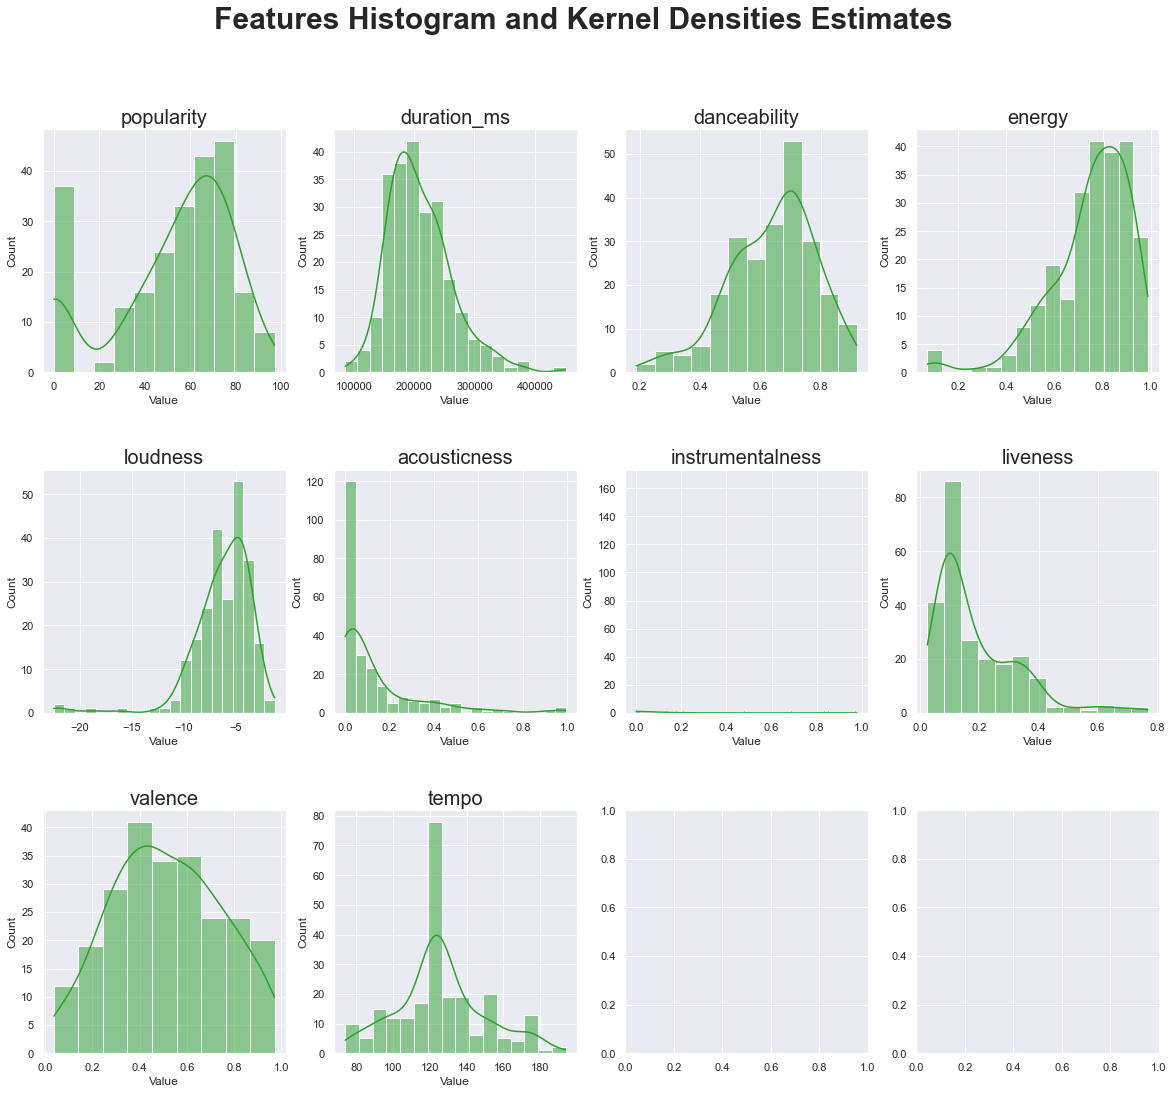

In [12]:
# Set rows and columns
nrows = 3
ncols = 4
tot_num_features = len(audio_features_col)

# Create figure
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 17))
plt.subplots_adjust(hspace=0.4)
for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        if i < tot_num_features:
            feature = df_songs[audio_features_col].columns[i]
            sns.histplot(df_songs[audio_features_col][feature], kde=True, color=color, ax=ax[row,col])
            ax[row, col].set_title(label=f'{feature}', fontsize=20)
            ax[row, col].set(xlabel='Value', ylabel='Count')
        else:
            pass
plt.suptitle('Features Histogram and Kernel Densities Estimates', fontsize=30, weight='bold')
plt.show()

### Correlation of audio features

<AxesSubplot:>

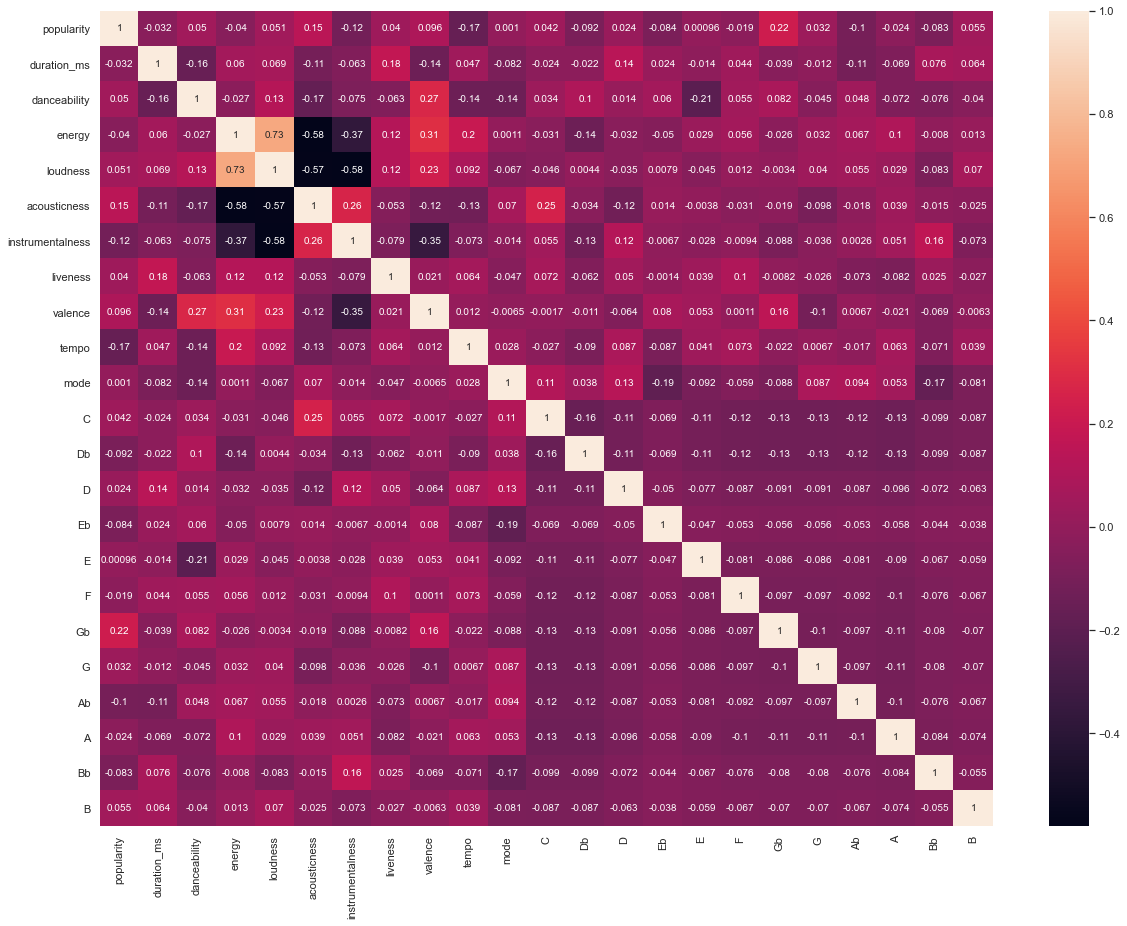

In [13]:
corr = df_songs[audio_features_col + categorical_col].corr()

%matplotlib inline

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

### Popular word in the title

In [14]:
# Write title of songs as a uniqu4 string
text = ' '.join(list(df_songs.title))

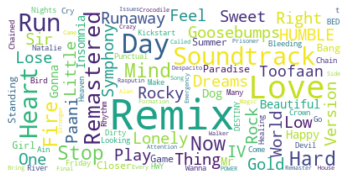

In [15]:
#text = df_songs['title'].to_list()
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Comparison with top 100 songs of 2021
Use dataset audio features of ~600k songs released in between 1922 and 2021. Here more info https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks. Keep just the top 100 songs by popularity

In [16]:
df_tot_tracks = pd.read_csv('/Users/MVadi/Desktop/HACKATHON/data/top_100_songs.csv', index_col=[0])

In [17]:
# Get top 100 songs by popularity
df_popular = df_tot_tracks.sort_values('popularity', ascending = False)
df_popular

,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
id,,,,,,,,,,,,,,,,,,,
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,4
7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4
3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4
5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4
6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59qrUpoplZxbIZxk6X0Bm3,Take You Dancing,87,190306,0,['Jason Derulo'],['07YZf4WDAMNwqr4jfgOZ8y'],2020-07-22,0.789,0.711,2,-4.248,1,0.0410,0.03320,0.000000,0.0876,0.7530,112.985,4
2bgcUk2A3jjKbCJ7KPquTi,Mi Niña,87,213314,0,"['Wisin', 'Myke Towers', 'Los Legendarios']","['3E6xrwgnVfYCrCs0ePERDz', '7iK8PXO48WeuP03g8Y...",2020-09-23,0.823,0.821,8,-3.402,0,0.1660,0.31000,0.000004,0.1430,0.7910,99.999,4
2U5WueTLIK5WJLD7mvDODv,Wishing Well,87,194621,1,['Juice WRLD'],['4MCBfE4596Uoi2O4DtmEMz'],2020-07-10,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.000000,0.2670,0.0804,149.972,4


In [18]:
# Function to normalize column of a dataset
def normalize_df(df):
    columns = df.columns.to_list()
    index = df_radar_chart.index
    x = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=columns, index=index)

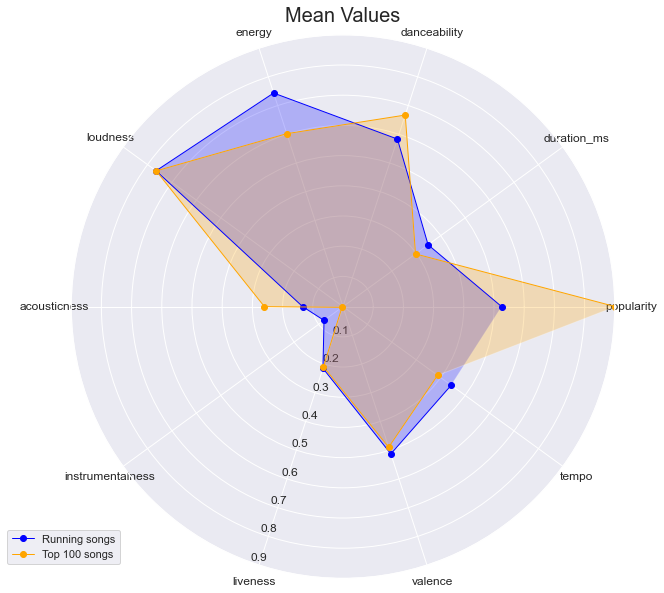

In [19]:
# Merge running songs and popular in the same dateset, so possible to normalize them
df_radar_chart = pd.concat([df_songs[audio_features_col], df_popular[audio_features_col]], keys=['running', 'popular'])

# Normalize data
df_radar_chart_norm = normalize_df(df_radar_chart)

# Get means
mean_running = df_radar_chart_norm.filter(like = 'running', axis=0).mean().tolist()
mean_popular = df_radar_chart_norm.filter(like = 'popular', axis=0).mean().tolist()

# Set the figure
angles = np.linspace(0, 2*np.pi, len(audio_features_col), endpoint=False)
fig = plt.figure(figsize = (22, 22))

# Set axis
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_running, 'o-', linewidth=1, label = "Running songs", color='blue')
ax.fill(angles, mean_running, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, audio_features_col, fontsize = 12)

ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', 
                                                            '0.8', '0.9'], size=12)
plt.ylim(0, 0.9)

ax.plot(angles, mean_popular, 'o-', linewidth=1, label = "Top 100 songs", color='orange')
ax.fill(angles, mean_popular, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values', fontsize = 20)
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

# Whats next?
- Get raccomendations based on some audio features data